Linear Regression

minimize the sum of squares

In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("data/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [7]:
df[["area"]]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
df["area"]

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

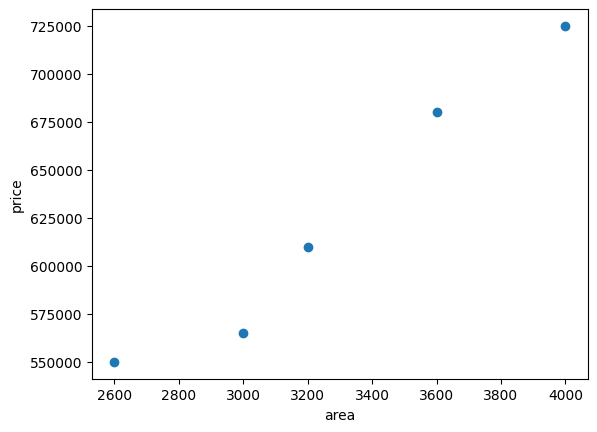

In [5]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price)

In [12]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df[["price"]]) #training with the available datapts  'need to give 2d array

LinearRegression()

In [16]:
reg.predict([[3300]])

c:\Users\vtshu\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [18]:
#y = mx + b
#m is given by slope:
reg.coef_

array([[135.78767123]])

In [19]:
#b is 
reg.intercept_

array([180616.43835616])

In [23]:
#if we give an area as list
d = pd.read_csv("data/areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [25]:
p = reg.predict(d)

In [26]:
d["predict"] = p

In [27]:
d

,area,predict
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [28]:
d.to_csv("data/prediction.csv")

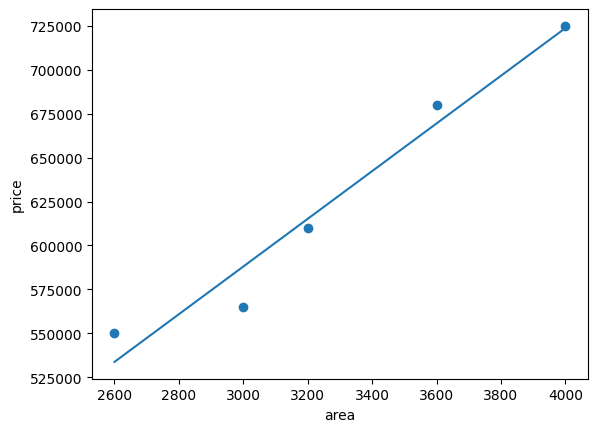

In [29]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[["area"]]))

In [30]:
#multivariate Linear regression
#y = m1 x1 + m2 x2 + b

In [33]:
#handling missing datapoints
df = pd.read_csv("data/homeprices_2.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [36]:
#we can take a median, avg or something and replace the nan
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [38]:
#fillna function (imp)

df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [39]:
reg = linear_model.LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df.price)

LinearRegression()

In [40]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [41]:
reg.intercept_

221323.00186540443

In [42]:
reg.predict([[3000,3,40]])

c:\Users\vtshu\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [49]:
df = pd.read_csv("data/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [50]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [51]:
pip install word2number

In [52]:
from word2number import w2n

df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [55]:
df.columns.values

array(['experience', 'test_score(out of 10)',
       'interview_score(out of 10)', 'salary($)'], dtype=object)

In [57]:
import math
median_test_score = math.floor(df["test_score(out of 10)"].mean())

In [58]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [64]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]], df[["salary($)"]])

LinearRegression()

In [65]:
reg2.predict([[2,9,6]])

c:\Users\vtshu\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53713.86677124]])